In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from util.general import load_csv_pandas
from util.general import load_csv
from util.executable import get_destination

In [17]:
data_df=pd.read_csv(get_destination('csv\\train.csv'), encoding='utf-8')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464887 entries, 0 to 464886
Data columns (total 17 columns):
조사일자             464887 non-null object
품목명              464887 non-null object
조사지역명            464887 non-null object
당일조사가격           464887 non-null float64
평균기온(°C)         464887 non-null float64
최저기온(°C)         464887 non-null float64
최고기온(°C)         464887 non-null float64
강수 계속시간(hr)      400791 non-null float64
일강수량(mm)         412787 non-null float64
최대 풍속(m/s)       464887 non-null float64
평균 풍속(m/s)       464887 non-null float64
최소 상대습도(pct)     464887 non-null float64
평균 상대습도(pct)     464887 non-null float64
합계 일조시간(hr)      464887 non-null float64
합계 일사량(MJ/m2)    464887 non-null float64
평균 수온(°C)        464887 non-null float64
평균 최대 파고(m)      464887 non-null float64
dtypes: float64(14), object(3)
memory usage: 60.3+ MB


** object -> to_datetime  **

In [24]:
# to_datetime  because '조사일자' is object 
data_df['조사일자'] = data_df.조사일자.apply(pd.to_datetime)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464887 entries, 0 to 464886
Data columns (total 17 columns):
조사일자             464887 non-null datetime64[ns]
품목명              464887 non-null object
조사지역명            464887 non-null object
당일조사가격           464887 non-null float64
평균기온(°C)         464887 non-null float64
최저기온(°C)         464887 non-null float64
최고기온(°C)         464887 non-null float64
강수 계속시간(hr)      400791 non-null float64
일강수량(mm)         412787 non-null float64
최대 풍속(m/s)       464887 non-null float64
평균 풍속(m/s)       464887 non-null float64
최소 상대습도(pct)     464887 non-null float64
평균 상대습도(pct)     464887 non-null float64
합계 일조시간(hr)      464887 non-null float64
합계 일사량(MJ/m2)    464887 non-null float64
평균 수온(°C)        464887 non-null float64
평균 최대 파고(m)      464887 non-null float64
dtypes: datetime64[ns](1), float64(14), object(2)
memory usage: 60.3+ MB


C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\park\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current

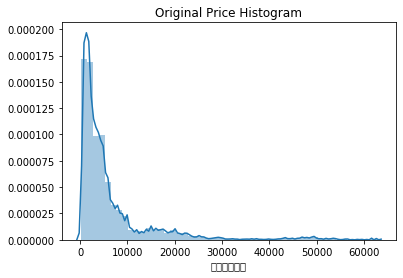

In [25]:
plt.title('Original Price Histogram')
sns.distplot(data_df['당일조사가격'])

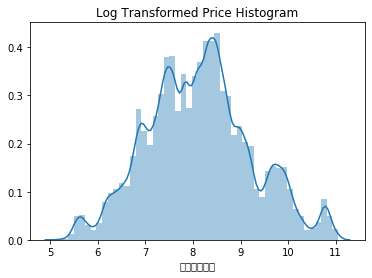

In [28]:
plt.title('Log Transformed Price Histogram')
log_Price = np.log1p(data_df['당일조사가격'])
sns.distplot(log_Price)

# Compare: numeric value( nomal vs log1p ) // Base skew_values

In [33]:
orgin_df=pd.read_csv('https://production-bobsim.s3.ap-northeast-2.amazonaws.com/public_data/public_price/origin/csv/201908.csv', encoding='euc-kr')

In [34]:
columns = [
            "조사일자", "조사구분명",
            "표준품목명", "조사가격품목명", "표준품종명", "조사가격품종명",
            "조사등급명", "조사단위명", "당일조사가격", "조사지역명"
        ]

In [35]:
filtered_df=orgin_df[columns]

## Check numeric type

In [36]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97414 entries, 0 to 97413
Data columns (total 10 columns):
조사일자       97414 non-null object
조사구분명      97414 non-null object
표준품목명      97414 non-null object
조사가격품목명    97414 non-null object
표준품종명      97414 non-null object
조사가격품종명    97414 non-null object
조사등급명      97414 non-null object
조사단위명      97414 non-null object
당일조사가격     97414 non-null int64
조사지역명      97414 non-null object
dtypes: int64(1), object(9)
memory usage: 7.4+ MB


### hist using displot

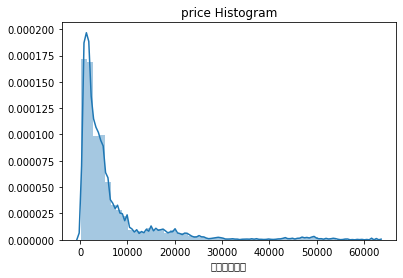

In [37]:
# see distribution of numecric type 
plt.title('price Histogram')
sns.distplot(data_df['당일조사가격'])


In [ ]:
# check skew 
from scipy.stats import skew
features_index = filtered_df.dtypes[filtered_df.dtypes != 'object'].index

# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = filtered_df[features_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

## 로그변환

In [40]:
filtered_df[skew_features_top.index] = np.log1p(filtered_df[skew_features_top.index])

C:\Users\park\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## 분포도 확인 ( 결정한 이유 )

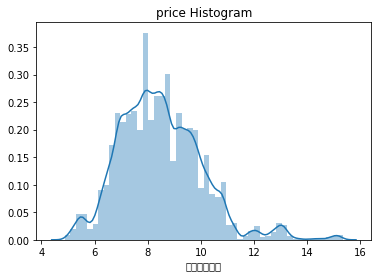

In [42]:
# see distribution of numecric type 
plt.title('price Histogram')
sns.distplot(filtered_df['당일조사가격'])

In [43]:
skew(filtered_df['당일조사가격'])

0.7655006976533527

### datetime 타입에서 년, 월, 일, 시간 추출


In [48]:
filtered_df['조사일자'] = filtered_df.조사일자.apply(pd.to_datetime)

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
filtered_df['year']= filtered_df.조사일자.apply(lambda x : x.year)
filtered_df['month']=filtered_df.조사일자.apply(lambda x : x.month)
filtered_df['day']=filtered_df.조사일자.apply(lambda x: x.day)

C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\park\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [50]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97414 entries, 0 to 97413
Data columns (total 13 columns):
조사일자       97414 non-null datetime64[ns]
조사구분명      97414 non-null object
표준품목명      97414 non-null object
조사가격품목명    97414 non-null object
표준품종명      97414 non-null object
조사가격품종명    97414 non-null object
조사등급명      97414 non-null object
조사단위명      97414 non-null object
당일조사가격     97414 non-null float64
조사지역명      97414 non-null object
year       97414 non-null int64
month      97414 non-null int64
day        97414 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 9.7+ MB


In [59]:
temp1=pd.read_csv('https://production-bobsim.s3.ap-northeast-2.amazonaws.com/public_data/public_price/origin/csv/201908.csv', encoding='euc-kr')
columns = [
            "조사일자", "조사구분명",
            "표준품목명", "조사가격품목명", "표준품종명", "조사가격품종명",
            "조사등급명", "조사단위명", "당일조사가격", "조사지역명"
        ]

In [60]:
def unit_fit(unit_name):
    unit=0
    if unit_name=='20KG' : unit= 200
    elif unit_name=='1.2KG' : unit= 12
    elif unit_name=='8KG' : unit= 80
    elif unit_name=='1KG' : unit=10
    elif unit_name=='1KG(단)' : unit=10
    elif unit_name=='1KG(1단)': unit=10
    elif unit_name=='10개': unit=10
    elif unit_name=='10마리': unit=10
    elif unit_name=='1L' : unit=10 
    elif unit_name=='100G': unit= 1
    elif unit_name=='1개' : unit= 1
    elif unit_name=='1마리' : unit= 1
    elif unit_name=='1속' : unit= 1
    elif unit_name=='1포기' : unit= 1
    elif unit_name=='200G' :unit=2
    elif unit_name=='2마리' : unit= 2
    elif unit_name=='500G' : unit= 5
    else  : unit= 6
    
    return unit

In [62]:
temp2=temp1[temp1['조사구분명']=='소비자가격']
temp2 =temp2[['조사일자', '조사가격품목명','표준품종명','조사가격품종명','표준품목명','조사지역명','조사단위명','당일조사가격']]


In [64]:
temp2['price_unit']= temp2['조사단위명'].apply(lambda x : unit_fit(x))
temp2['averge_price']= temp2['당일조사가격']/temp2['price_unit']

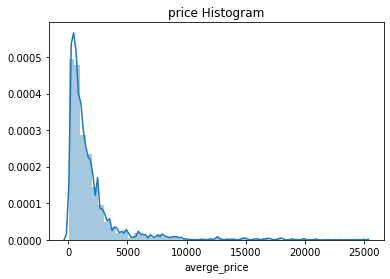

In [65]:
# see distribution of numecric type 
plt.title('price Histogram')
sns.distplot(temp2['averge_price'])

In [66]:
skew(temp2['averge_price']) # 소비자가격 skew

3.8459733534846507

In [68]:
skew(temp1['당일조사가격']) # 모든가격 skew

13.296264438735514

In [71]:
temp2['averge_price'] = np.log1p(temp2['averge_price'])
print('로그변화 후 skew 값')
skew(temp2['averge_price'])

로그변화 후 skew 값


-0.28962581863192055

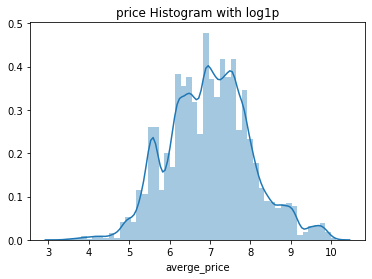

In [70]:
plt.title('price Histogram with log1p')
sns.distplot(temp2['averge_price'])